In [29]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

import sklearn 


In [30]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
X = dataset.iloc[:,[1,2,6,7]].values
y = dataset.iloc[:,8].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8) 

In [33]:
from sklearn.preprocessing import StandardScaler
S_X = StandardScaler()
X_train = S_X.fit_transform(X_train)
X_test = S_X.transform(X_test)

In [34]:
# Problem 1 
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
model.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [38]:
#score shows accuracy of the model
model.score(X_test,y_test)

0.7792207792207793

In [39]:
#Predict probability of x test 
y_pred = classifier.predict(X_test)
y_pred[0:9]

array([1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
#Using Confusion matrix for accuracy for the model
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[93, 11],
       [23, 27]], dtype=int64)

In [41]:
#Accuracy, Precision, and Recall using the model metrics
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("Recall" ,metrics.recall_score(y_test, y_pred))

Accuracy: 0.7792207792207793
Precision 0.7105263157894737
Recall 0.54


Text(0.5, 257.44, 'Predicted label')

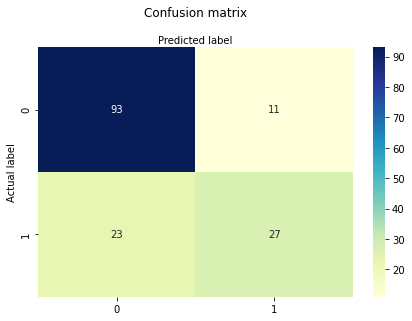

In [42]:
# Visualization of confusion matrix 
import seaborn as sns 
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Create map 
sns.heatmap(pd.DataFrame(cf_matrix), annot=True,cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
# Problem 2 
# Naive Bayes Binary Classifier 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [44]:
y2_pred = classifier.predict(X_test)

In [45]:
y2_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y2_pred)
ac = accuracy_score(y_test, y2_pred)


In [47]:
cm 

array([[92, 12],
       [21, 29]], dtype=int64)

In [48]:
ac

0.7857142857142857

In [49]:
from sklearn import metrics 

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

print("Precision:", metrics.precision_score(y_test,y_pred))

print("Recall:", metrics.recall_score(y_test,y_pred))

Accuracy: 0.7792207792207793
Precision: 0.7105263157894737
Recall: 0.54


Text(0.5, 257.44, 'Predicted label')

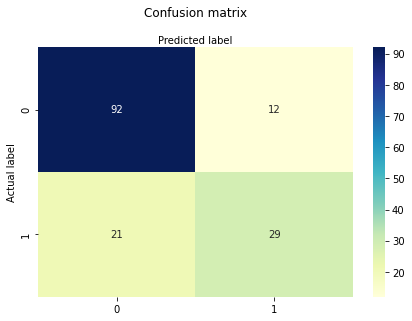

In [50]:
import seaborn as sns 
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap 
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
# Problem 3 
# Use the k-fold cross validation for the logistic regression, perform two training times for K=5 and K=10. 

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv = 5)
scores

array([0.74796748, 0.75609756, 0.78861789, 0.7398374 , 0.70491803])

In [53]:
scores = cross_val_score(classifier, X_train, y_train, cv = 10)
scores

array([0.75806452, 0.74193548, 0.69354839, 0.80645161, 0.81967213,
       0.75409836, 0.75409836, 0.70491803, 0.75409836, 0.6557377 ])

In [54]:
#Problem 4 
# K-fold cross-validation for your training and validaton
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [55]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(classifier, X_train, y_train, cv = 5)
scores

array([0.7398374 , 0.75609756, 0.78861789, 0.7398374 , 0.71311475])

In [56]:
scores = cross_val_score(classifier, X_train, y_train, cv = 10)
scores

array([0.74193548, 0.74193548, 0.69354839, 0.82258065, 0.85245902,
       0.73770492, 0.7704918 , 0.70491803, 0.7704918 , 0.63934426])